***KNN for Iris dataset***

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
from matplotlib import pyplot as plt

In [7]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

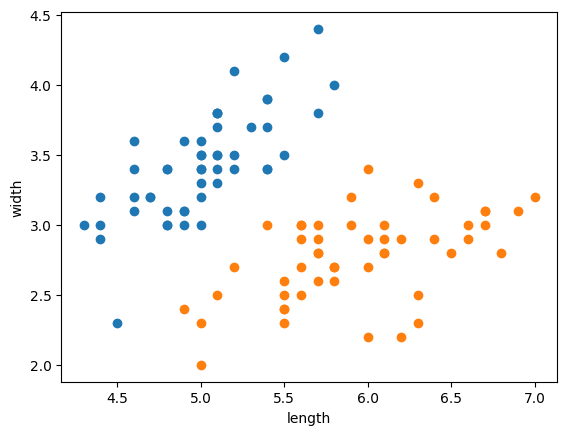

In [8]:
plt.xlabel("length")
plt.ylabel("width")
plt.scatter(df0['sepal length (cm)'] , df0['sepal width (cm)'] )
plt.scatter(df1['sepal length (cm)'] , df1['sepal width (cm)'] )

In [9]:
X = df.drop(['target', 'flower_names'] ,axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Y=df.target

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [13]:
df.shape

(150, 6)

In [14]:
# Making KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.score(X_test,Y_test)

0.9666666666666667

In [16]:
from sklearn.metrics import confusion_matrix
y_pred= knn.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Text(58.222222222222214, 0.5, 'truth')

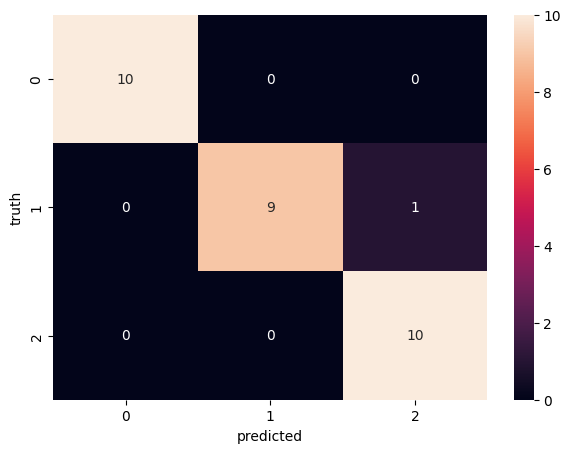

In [17]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

**kNN Code from scratch**


In [18]:
import numpy as np
from collections import Counter

def eucledian_distance(x1,x2):
  distance=np.sqrt(np.sum((x1-x2)**2))
  return distance

class KNN:
  def __init__(self,k=3):
    self.k = k

  def fit(self , X,Y):
    self.X_train=X
    self.Y.train=Y

  def predict(self , X):
     predictions =[self._predict(x) for x in X]
     return predictions


  def _predict(self, x):
    #compute distances
    distances = [eucledian_distance(x , x_train) for x_train in self.X_train]

    #getting closest k
    k_indices= np.argsort(distances)[:self.k]
    k_nearest_labels=[self.y_train[i] for i in k_indices]

    #majority vote
    t= Counter(k_nearest_labels).most_common()
    return t